Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>.

# Gradient Descent

## Contents

- #### What is Gradient Descent
- #### Gradient Descent for Linear Regression
- #### Math
  - ##### Derivaties
  - ##### Partial Derivatives
- #### Gradient Descent for Linear Regression
  - ##### Cost Function
  - ##### Learning Rate
  - ##### Optimize for both Slope and Intercept
  - ##### Boston Housing Dataset
- #### Stochastic Gradient Descent
- #### Mini-batch Gradient Descent
- #### Gradient Descent for Logistic Regression
- #### Gradient Descent in Neural Networks



### What is Gradient Descent

In simple terms, Gradient Descent is an algorithm to **compute the minimum of a function**. OK - So, what is the big deal ? Well, most of the time in most machine learning algorithms, there is always a cost function that needs to be minimized. The best Machine Learning Algorithm is usually the one with the most inclusive and simple cost function. Once a cost function is defined, it is just a matter of solving for a minimum to arrive at the solution. That is why _Gradient Descent_ is extremely useful in the context of Machine learning. Let's see an example.

### Gradient Descent for Linear Regression

Let's start with the simplestML problem - Linear Regression. In the <a href="https://ajaytech.co/machine-learning-in-python/">Machine Learning in Python Tutorial</a>, we have covered <a href="https://ajaytech.co/python-regression/">Regression in Python</a> in great detail. 

Since the problem is simple enough to be solved mathematically, we have used the **OLS** (Ordinary Least Squares) technique to fit a straight line to the Linear Regression problem. You can view the <a href="https://ajaytech.co/python-regression/#Sum-of-Squares">equation for Ordinary Least Square </a> to solve linear regression here. What is the cost function in this case ?

picture here

**Cost function** = Sum of Squares of Residuals

# Cost function =  $\frac{1}{2 \times n} \sum_{i=1}^n {error}^2$ = $\frac{1}{2 \times n} \sum_{i=1}^n (y_i - \hat{y})^2$

The mathematical solution to minimize this cost function as derived by **OLS** is as follows. 

# $m_{slope} = \frac{\sum_{i=1}^n (y-\bar{y}) \times (x-\bar{x})}{ \sum_{i=1}^n (x-\bar{x})^2} $

where $\bar{x}$ represents the average of x and $\bar{y}$ represents the average of y 

However, when the number of independent variables increase, **OLS** is not a good solution. That is where **Gradient Descent** shines. While OLS is an analytical solution, Gradient Descent is a numerical solution. However, to understand _Gradient Descent_, we have to be conversant with the following concepts in Math. 

- Derivatives
- Partial Derivatives

### Math

#### Derivatives

A derivative is the slope of a function. Let's take a simple straight line - 

# $y = 2 \times x$ 

A simple dataset for this could be

- x = Number of DNA Samples
- y = Number of DNA pairs.

Let's plot a sample dataset and try to compute the slope.

x =  [ 1  2  3  4  5  6  7  8  9 10]
y =  [ 2  4  6  8 10 12 14 16 18 20]


Text(3, 3, '2')

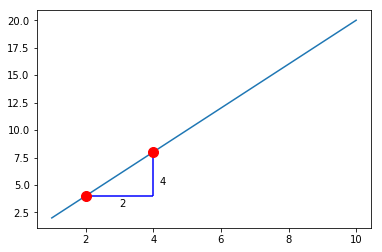

In [61]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = x * 2

print ( "x = ",x)
print ( "y = ",y)

plt.plot(x,y)
plt.plot(x[1], y[1], marker='o', markersize=10, color="red")
plt.plot(x[3], y[3], marker='o', markersize=10, color="red")

plt.hlines(y=y[1], xmin=x[1], xmax=x[3], color='b')
plt.vlines(x=x[3], ymin=y[1], ymax=y[3], color='b')

plt.text(4.2,5,(y[3] - y[1]))
plt.text(3,3,(x[3] - x[1]))

# $slope = \frac {4}{2} = 2$

Mathematically, the slop of the equation $y = 2x$ is defined as

## $\frac{dy}{dx} = \frac {2 x} {x} = 2 $

And that's what you see as the **m** in $y = m x$

How about a second order equation ?

# $y = x^2$

A simple dataset for this could be

- x = Reach of a product
- y = Sales of the product.

Let's plot a sample dataset and try to compute the slope.

x =  [ 1  2  3  4  5  6  7  8  9 10]
y =  [  1   4   9  16  25  36  49  64  81 100]


Text(8.58, 45, 'slope = 14')

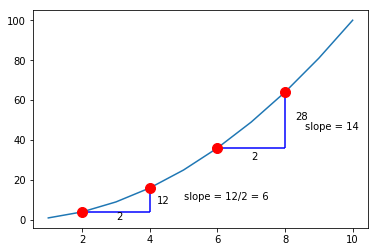

In [60]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = x ** 2

print ( "x = ",x)
print ( "y = ",y)

plt.plot(x,y)
plt.plot(x[1], y[1], marker='o', markersize=10, color="red")
plt.plot(x[3], y[3], marker='o', markersize=10, color="red")

plt.hlines(y=y[1], xmin=x[1], xmax=x[3], color='b')
plt.vlines(x=x[3], ymin=y[1], ymax=y[3], color='b')

plt.text(4.2,8,(y[3] - y[1]))
plt.text(3,0.0,(x[3] - x[1]))

plt.text(5,10,"slope = 12/2 = 6")

plt.plot(x[5], y[5], marker='o', markersize=10, color="red")
plt.plot(x[7], y[7], marker='o', markersize=10, color="red")

plt.hlines(y=y[5], xmin=x[5], xmax=x[7], color='b')
plt.vlines(x=x[7], ymin=y[5], ymax=y[7], color='b')

plt.text(8.3,50,(y[7] - y[5]))
plt.text(7,30,(x[7] - x[5]))

plt.text(8.58,45,"slope = 14")

In this case, the slope is not constant as measured by same metric as we have done previously. The slope seems to be changing with x. 

A correct way to define slope (or derivative) is to take an infinitesimally small increase in x and the corresponding value of y and divide them as before. Mathematically, it is defined as,

If $f(x)$ is a function of x, 

# $$\frac{d(f(x))}{dx} = Lim_{dx\to0} \frac{f(x + dx) - f(x)}{dx}$$


For example, if x = 4, increase x by a very small amount, say $\Delta = 0.0001$. Now, let's compute the value of y as well and plug them into the equation above

- $x$ = 4
- $dx$ = 0.0001

## $Lim_{dx\to0} \frac{(4 + 0.0001)^2 - 4^2}{0.0001} = \frac{0.0008}{0.0001} \approx 8 = 2 \times 4 = 2 \times x$

so, the derivative of $f(x) = x^2$ is $2x$ . We have not derived this mathematically - instead, we are trying to understanding with numbers, how a derivative works.

> **Derivative** represents the change in the value of a function with respect to the variable _(with which the derivative is being applied)_

#### Partial Derivatives

Partial derivatives are almost similar to regular derivatives - except that partial derivatives work only on a particular variable. For example, say the speed of a car is dependent on
- engine RPM
- slope of the road

## $speed = 8 \times x_{rpm} + 2 \times y_{slope}$

you can also write it as

## $z = 8x + 2y$

Now, how does the speed ($z$) of the car vary with a unit increase in the engine RPM ? The answer is 8 - pretty straightforward. That is represented mathematically using

## $\frac{\partial z}{\partial x} = \frac{\partial (8x + 2y)}{\partial x} = 8$

Let's take another example - The equation of a 2-d plane can be generalized as below

## $f(x,y) = 3x + 4y + 2$

You can visualize a plane like this - 

<img src="./pics/2d-plane.png"/>

As you can see, the plane intersects the z-axis at 2 ( Where the value of x & y are 0 ). Now, how far does the function vary, with a unit variation in x ? 

## $f(x,y)_{old} = 3 \times 1 + 4y + 2$

## $f(x,y)_{new} = 3 \times (1+.0001) + 4y + 2$

## $f(x,y)_{new} - f(x,y)_{old} = 0.0003$

For a unit change ( say 0.0001 in x ), the function changes by 0.0003. So, the differential change is $\frac {0.0003}{0.0001} = 3$

Mathematically, 

## $\frac{\partial f(x,y)}{\partial x} =\frac{\partial (3x + 5y + 2)}{\partial x} = 3$

Once again, I want you to take the intuitive meaning out of this - 

> For a unit change in x, the function changes by so much in the direction of x - That is a partial derivative. 

A plane is simple to understand. However, the interpretation would be the same even if it were a complicated curve in a 3-d space - Like a hill. 

### Gradient Descent for Linear Regression

Now that we understand derivaties (both regular and partial), we are ready to graduate to Gradient Descent. Imagine a set of data points like so. 

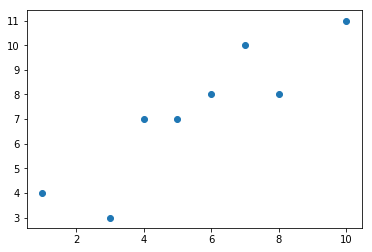

In [86]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1,3,4,5,6,7,8,10])
y = np.array([4,3,7,7,8,10,8,11])

plt.scatter(x,y)

Say, we want to fit a straight line to this data set using <a href="https://ajaytech.co/python-regression">Linear Regression</a>. How would you do it ? Very simple

In [121]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

model.fit(x.reshape(-1,1),y) 

slope = model.coef_  
intercept   = model.intercept_

print ( "slope = ", slope)
print ( "intercept = ", intercept)


slope =  [0.84482759]
intercept =  2.6034482758620694


[2.60344828] [15.27586207]


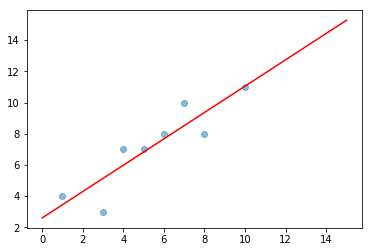

In [98]:
point_1 = slope*0 + intercept 
point_2 = slope*15 + intercept 
print ( point_1, point_2) 
plt.scatter( x,y,alpha=0.5)
plt.plot([0,15], [point_1,point_2],color="red")

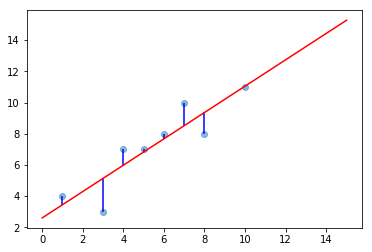

In [100]:
plt.scatter( x,y,alpha=0.5)
plt.plot([0,15], [point_1,point_2],color="red")

y_actual    = y
y_predicted = model.predict(x.reshape(-1,1))

for index,x_count in enumerate(x) :
    if y_actual[index] > y_predicted[index] :
        plt.vlines(x=x_count, ymin=y_predicted[index], ymax=y_actual[index], color='b')
    if y_actual[index] <= y_predicted[index] :
        plt.vlines(x=x_count, ymin=y_actual[index], ymax=y_predicted[index], color='b')

The blue lines represent the residuals (or errors). We can calculate the slope (and intercept) of the fit using OLS (Ordinary Least Squares) or using Gradient Descent. We already know how <a href="https://ajaytech.co/python-regression/#Sum-of-Squares">OLS works in Linear Regression</a>. We will see how Gradient Descent works. The equation for a straight line that would fit all the data points is some variation of 

## $y = m x + b$

where 
- m = slope
- b = intercept

Either way, we are minimizing the _Sum of Squares of Errors_. We started out with the definition of this at the beginning of the chapter. 

# Cost function =  $\frac{1}{2 \times n} \sum_{i=1}^n {error}^2$ = $\frac{1}{2 \times n} \sum_{i=1}^n (y_i - \hat{y})^2$

where 
- $y_i$ = actual value
- $\hat{y}$ = predicted value

Since we are using linear regression to predict the value of y, let's substitute $\hat{y}$ with the following.

# Cost function =  $\frac{1}{2 \times n} \sum_{i=1}^n (y_i - (mx + b))^2$

Just to make things simple, assume a value of intercept (b) to be fixed at 2.6 ( b = 2.6 as we have previously solved for it). Imagine that we chart the cost function with different values of slope(m).

In [130]:
n = len(y)

cost_function = []
m = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
for slope in m : 
    cost = 0
    for i in range(n):
        cost = cost + (1/(2*n)) * ( (y_actual[i] - slope * x[i] - 2.6) ** 2 )
    cost_function.append(cost)

    


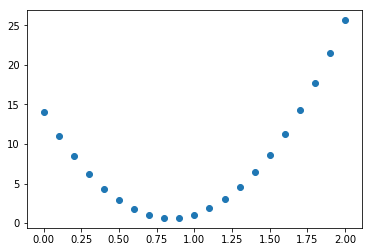

In [131]:
plt.scatter(m,cost_function)

Visually, we can eyeball the minimum value of the cost function to be somewhere around 0.8. This is inline with the scikit learn's LinearRegression model that we have solved above. 

But how to mathematically solve for this (without using Ordinary Least Squares) ? That is where Gradient Descent comes in. 

> Gradient Descent is a technique to find out the minimum of a function numerically.

Imagine a ball put at a random location on the cost curve shown above. 

<img src="./pics/ball-rolling-gradient-descent.png"/>

If you were to let the ball go, it would roll down to the bottom. Why does this happen ? Gravity moves the ball from a higher energy state to a lower energy state. You already know this. What is more interesting is the path it takes. The path should always be from a position of higher slope to a position of lower slope. 

<img src="./pics/gradient-descent-ball-rolling-2.png"/>

If you see the slope of the ball at each of the 4 positions highlighted above, it is pretty clear that the slope(dashed line) is decreasing with every move down the curve. Slope represents the derivative of the curve. In this case derivative of the cost function with respect to the slope (x-axis). 

#### How much do you move by ? 

The amount and the direction you move is controlled by how much the cost function changes. 

# Cost function = $\frac{1}{2 \times n} \sum_{i=1}^n (y_i - (mx_i + b))^2$

How much we move is based on how fast the cost function changes with the slope (or intercept). The way to learn that is by finding out the derivative of the cost function with respect to the slope (and intercept). For now, just to make things simple and to be able to view things in 2D, we are only keeping the slope as the variable (and the intercept as constant). We will see in the next section how to work on minimizing the cost function for both slope and intercept.

# $\frac {\partial {(Cost function)}}{\partial{m}}$ = $2 \times \frac{1}{2n} \sum_{i=1}^n (y_i - (mx_i + b)) \times (-x_i)$

or

# $\frac {\partial {(Cost function)}}{\partial{m}}$ = $\frac{-1}{n} \sum_{i=1}^n (y_i - (mx_i + b)) \times x_i$

In [25]:
x = x.astype(float)
y = y.astype(float)

print ( x )
print ( y )
steps = 5
m = 0
n = len(x)
l_rate = 0.0001

# Start Gradient Descent
for step in range(steps) :
    y_pred = m * x + 2.6

    # Derivative of the cost function w.r.t m
    m_der  = (-1/n) * sum( (y - y_pred) * x)
    
    # move m
    m = m -  m_der
    print ( m)

[ 1.  3.  4.  5.  6.  7.  8. 10.]
[ 4.  3.  7.  7.  8. 10.  8. 11.]
31.700000000000003
-1125.3500000000001
41106.975000000006
-1500372.8875000002
54763642.09375


The value of $m$ oscillates hugely. That is because, $m$ gives a general sense of direction, but doesn't tell us how far we need to go. You can't go an infinite distance in the direction of m. We need to take baby steps. 

> Take a small step, evaluate slope, take another small step in the direction of the least slope. This is the essence of Gradient Descent.

It is like a baby learning to take steps. So, there is a concept called **learning rate** that controls how far we move in the direction of the most descent. Let's rewrite the program with _learning rate_.

## $m = m - L_{rate} \times \frac {\partial {(Cost function)}}{\partial{m}}$

where $L_{rate} = $ Learning rate

In [121]:
l_rate = 0.001
steps = 1000
m = 0

m_array = []

# Start Gradient Descent
for step in range(steps) :
    y_pred = m * x + 2.6

    # Derivative of the cost function w.r.t m
    m_der  = (-1/n) * sum( (y - y_pred) * x)
    
    # move m
    m = m -  l_rate * m_der
    m_array.append(m)

print ( "optimum slope (m) = ", m)

optimum slope (m) =  0.8453333333333318


Let's plot the journey of the ball down the cost curve. 

Text(0, 0.5, 'cost function')

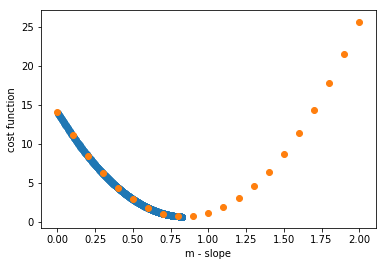

In [69]:
# Cost Function 
n = len(y)
y_actual    = y

cost_function = []
m = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
for slope in m : 
    cost = 0
    for i in range(n):
        cost = cost + (1/(2*n)) * ( (y_actual[i] - slope * x[i] - 2.6) ** 2 )
    cost_function.append(cost)


# Steps taken    
n = len(y)

cost_function_m = []
m_steps = m_array
for slope in m_steps : 
    cost = 0
    for i in range(n):
        cost = cost + (1/(2*n)) * ( (y_actual[i] - slope * x[i] - 2.6) ** 2 )
    cost_function_m.append(cost)

plt.scatter(m_steps,cost_function_m) # steps taken.
plt.scatter(m,cost_function) # cost function
plt.xlabel("m - slope")
plt.ylabel("cost function")

As you can see, even after 500 steps, the ball was not able to roll down to it's minimum. That is because of such a small learning rate - 0.0001. 

<img src="./pics/gradient-descent-different-learning-rates.png"/>

#### Learning Rate

How fast do you go down the path ? It depends on how fast you want to converge (without overshooting). An arbitrary parameter called learning rate( &alpha; ) would determine how fast you go down the path. If you want to converge fast, can you increase the learning rate ? Probably not. Here is why. 

If you set a learning rate = 0.1, that is roughly how fast you move along the x-axis. However, if you set the learning rate to 0.7 (thinking you could move down the curve faster), here is what would happen - You essentially miss the minimum. 

<img src="./pics/higher-learning-rate-gradient-descent.png"/>

Here is a quick plot of how the ball moves with a learning rate of 0.05 within just 100 iterations. The ball is going back and forth because it is overshooting. However, it finally settles down at the minimum. 

<img src="./pics/gradient-descent-high-learning-rate-fluctuations.png"/>

#### Optimize Gradient Descent for both Slope & Intercept

So far, we have optimized Gradient Descent for just _slope_. How about the intercept ? The moment we introduce the 2nd parameter - _intercept_ , the cost function becomes 3d. 

- x-axis = **slope**
- y-axis = **intercept**
- z-axis = **cost function**

Matplotlib provides a rudementary 3d scatter plot. We will be using that to plot the 3d plot of the cost function.

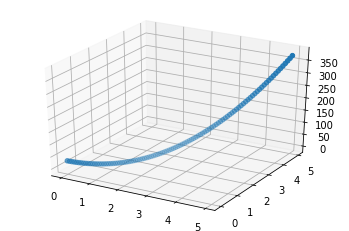

In [90]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,3,4,5,6,7,8,10])
y = np.array([4,3,7,7,8,10,8,11])

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

slope_values     = np.arange(start=0,stop=5,step=0.05)
intercept_values = np.arange(start=0,stop=5,step=0.05)
# y_pred    = slope * x + intercept

n = len(y)

cost_function = []

for index, slope in enumerate(slope_values) : 
    cost = 0
    for i in range(n):
        cost = cost + (1/(2*n)) * ( (y[i] - slope_values[index] * x[i] - intercept_values[index]) ** 2 )
    cost_function.append(cost)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(slope_values, intercept_values, cost_function,marker='o')

plt.show()

Jupyter notebook doesn't allo 3-d rotation, but if you try this in your standard IDE (say VS Code), you would be able to get a 3-d look at the plot. 

<img src="./pics/gradient-descent-3d-plot.png"/>

Now, let's optimize the cost function for both slope and intercept. Here are the partial derivatives of the cost function for the slope and intercept.

# $\frac {\partial {(Cost function)}}{\partial{m}}$ = $\frac{-1}{n} \sum_{i=1}^n (y_i - (mx_i + b)) \times x_i$

# $\frac {\partial {(Cost function)}}{\partial{b}}$ = $\frac{-1}{n} \sum_{i=1}^n (y_i - (mx_i + b))$

and the learning would go like this.

## $m = m - L_{rate} \times \frac {\partial {(Cost function)}}{\partial{m}}$
## $b = b - L_{rate} \times \frac {\partial {(Cost function)}}{\partial{b}}$

where 
- $L_{rate} = $ Learning rate
- $m =$ slope
- $b =$ intercept

In [130]:
x = np.array([1,3,4,5,6,7,8,10])
y = np.array([4,3,7,7,8,10,8,11])

l_rate = 0.01 # Learning rate
steps = 4000    # number of iterations ( steps )

m = 0 # initial slope
b = 0 # initial intercept

n = float(len(x))

m_array = []
b_array = []

# Start Gradient Descent
for step in range(steps) :
    y_pred = m * x + b

    # Derivative of the cost function w.r.t slope (m)
    m_der  = (-1/n) * sum( (y - y_pred) * x)
    # Derivative of the cost function w.r.t intercept (b)    
    b_der  = (-1/n) * sum( y-y_pred )
    
    # move m
    m = m -  l_rate * m_der
    b = b -  l_rate * b_der
    
    # gather the slope and intercept in an array to plot later 
    m_array.append(m)
    b_array.append(b)
    
print (" optimim slope(m) = ", m)
print ( "optimum intercept (m) = ", b)

 optimim slope(m) =  0.8450107631510549
optimum intercept (m) =  2.6022056448336817


Now that we have the 

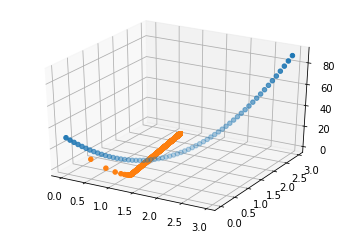

In [135]:
slope_values     = np.arange(start=0,stop=3,step=0.05)
intercept_values = np.arange(start=0,stop=3,step=0.05)

n = len(y)

cost_function = []

for index, slope in enumerate(slope_values) : 
    cost = 0
    for i in range(n):
        cost = cost + (1/(2*n)) * ( (y[i] - slope_values[index] * x[i] - intercept_values[index]) ** 2 )
    cost_function.append(cost)

slope_values_new     = m_array
intercept_values_new = b_array

cost_function_new = []
for index, slope in enumerate(slope_values_new) : 
    cost = 0
    for i in range(n):
        cost = cost + (1/(2*n)) * ( (y[i] - slope_values_new[index] * x[i] - intercept_values_new[index]) ** 2 )
    cost_function_new.append(cost)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(slope_values, intercept_values, cost_function,marker='o')
ax.scatter(slope_values_new, intercept_values_new, cost_function_new,marker='o')

plt.show()

#### Larger Dataset

Let's take a larger dataset to see how effective Gradient Descent is and how we can improve on it with other time saving techniques like stochastic gradient descent and mini-batch gradient descent later.

In [149]:
import numpy as np

height_weight = np.genfromtxt("./data/height_weight_male.csv",delimiter=",", skip_header=1)
height_weight.shape

from sklearn import datasets

boston = datasets.load_boston()
x = boston.data[:,5]
y = boston.target


Let's take the sixt parameter - Number of Rooms in the house (RM) to predict the median house price. There seems to be some kind of a linear relationship between them. 

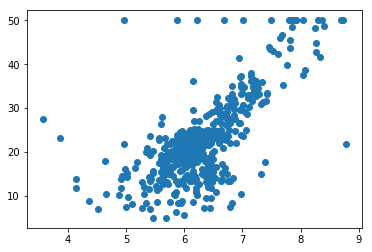

In [150]:
plt.scatter(x, y)

In [144]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

model.fit(x.reshape(-1,1),y) 

slope = model.coef_  
intercept   = model.intercept_

print ( "slope = ", slope)
print ( "intercept = ", intercept)


slope =  [9.10210898]
intercept =  -34.67062077643854


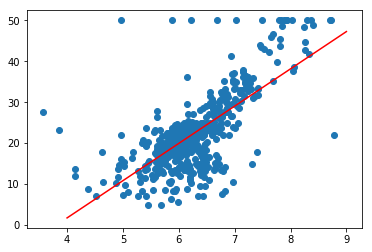

In [146]:
x_lower = 4
y_lower = slope * x_lower + intercept

x_higher = 9
y_higher = slope * x_higher + intercept

line_x = [x_lower,x_higher]
line_y = [y_lower,y_higher] 
plt.scatter(x, y)
plt.plot(line_x, line_y, color = "red")

time taken =  15.749347448348999
4.191089389663895 -3.4310456069532984


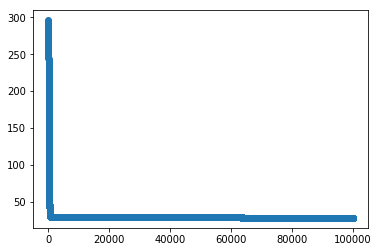

In [152]:
import numpy as np
import matplotlib.pyplot as plt

l_rate = 0.0001 # Learning rate
steps = 100000    # number of iterations ( steps )

m = 0.0 # initial slope
b = 0.0 # initial intercept

n = len(x)

cost_array = np.empty([steps],dtype="float64")

# Start Gradient Descent
for step in range(steps) :
    y_pred = m * x + b

    # Derivative of the cost function w.r.t slope (m)
    m_der  = (-1/n) * sum( (y - y_pred) * x)
    
    # Derivative of the cost function w.r.t intercept (b)    
    b_der  = (-1/n) * sum( y - y_pred )
    
    # move m
    m = m -  l_rate * m_der
    b = b -  l_rate * b_der
    
    cost = (1/(2*n)) * np.sum(np.square(y - y_pred))
    cost_array[step] = cost

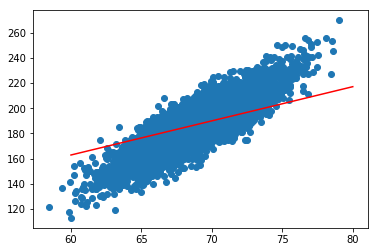

In [138]:
x_lower = 60
y_lower = m * x_lower + b

x_higher = 80
y_higher = m * x_higher + b

line_x = [x_lower,x_higher]
line_y = [y_lower,y_higher] 
plt.scatter(x, y)
plt.plot(line_x, line_y, color = "red")

### Stochastic Gradient Descent

At a learning rate of 0.04, and 10,000 iterations to converge on the solution, it has taken 1.3 seconds in total. This is very expensive if the dataset gets even larger. Make sense - the dataset got larger now ( around 500+ rows), compared to just 10 rows in the previous examples. 

The reason why this happens is because _Gradient Descent_ computes a prediction for all the rows in the dataset for every iteration. In the example above, I am referring to the step where we calculate the derivative using the sum of products of (y - y_pred). 

500+ rows in a dataset is actually quite small compared to real world datasets. Imagine real world problems like image processing that has millions of pixels in a single image. Gradient Descent becomes almost impossible to compute if we don't optimize.

One possible solution is to use **Stochastic Gradient Descent**. The word **Stochastic** stands for _random_. Instead of using every observation ( rows in the dataset), just use a random observation each time the derivative is being computed. 

time taken =  0.04088902473449707


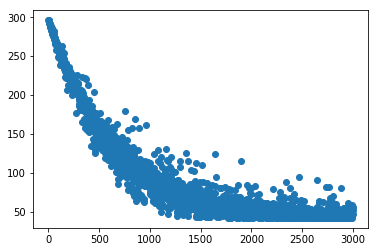

In [62]:
import time

begin_time = time.time()

x = boston.data[:,5]
y = boston.target

l_rate = 0.01 # Learning rate
steps = 3000  # number of iterations ( steps )

m = 0.0 # initial slope
b = 0.0 # initial intercept

n = float(len(x)) # number of observations in the data sample

cost_array = np.empty([steps],dtype="float64")

# Start Gradient Descent
for step in range(steps) :
    
    random_index = np.random.randint(0,len(x))
    y_pred = m * x[random_index] + b

    # Derivative of the cost function w.r.t slope (m)
    m_der  = (-1/n) * (y[random_index] - y_pred) * x[random_index]
    # Derivative of the cost function w.r.t intercept (b)    
    b_der  = (-1/n) * ( y[random_index]-y_pred )

    # move m
    m = m -  l_rate * m_der
    b = b -  l_rate * b_der
    
    cost = (1/(2*n)) * np.sum(np.square(y - y_pred))
    cost_array[step] = cost
    
end_time = time.time()    
print ( "time taken = ", (end_time - begin_time))

plt.scatter(range(steps),cost_array)



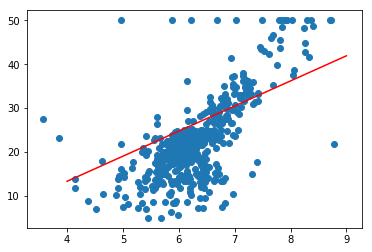

In [65]:
x_lower = 4
y_lower = m * x_lower + b

x_higher = 9
y_higher = m * x_higher + m

line_x = [x_lower,x_higher]
line_y = [y_lower,y_higher] 
plt.scatter(boston.data[:,5], boston.target)
plt.plot(line_x, line_y, color = "red")

As you can see, the time taken has been reduced by more than half (from 0.15 secs to 0.04 secs) when we shifted from standard gradient descent to stochastic gradient descent. This is just for an observation count of 500 rows. Imagine the performance gain if the number of rows were extremely large, as would happen in real datasets.

#### Mini-batch Gradient Descent

In practice though, a technique called mini-batch Gradient Descent is used. It is hybird solution between standard gradient descent and stochastic gradient descent. The following picture highlights the difference between standard vs stochastic vs mini-batch gradient descent methods. 

<img src="./pics/gradient-descent-batch-vs-stochastic.png"/>